# Regression

Simple Linear Regression

### Multiple Linear Regression

Polynomial Regression

Support Vector for Regression (SVR)

Decision Tree Regression

Random Forest Regression

### formula
dependent variable = y-intercept(constant) + (slope coefficient * independent variable )+ (slope coefficient * independent variable 2) + (slope coeffieicnt n * independent variable n)

No need to apply feature scaling in multiple linear regression. 

In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# import the dataset
df = pd.read_csv("50_Startups.csv", encoding='ISO-8859-1')

In [3]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [35]:
# Continuing on importing the dataset
x = df.iloc[:, :-1].values # taking in all the values.take in all the columns excluding the last column in x
y = df.iloc[:, -1].values # take in the last column in y

In [36]:
print(x[4:10])

[[142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']]


In [37]:
print(y[0:4])

[192261.83 191792.06 191050.39 182901.99]


In [38]:
# Identify numerical and non-numerical variables
numerical_vars = []
categorical_vars = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numerical_vars.append(column)
    else:
        categorical_vars.append(column)


In [11]:
print("Numerical variables:", numerical_vars)
print("Categorical variables:", categorical_vars)

Numerical variables: ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
Categorical variables: ['State']


In [17]:
# Encoding categorical data
# import the library
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [18]:
#Categorise the fourth column, which is index 3

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [20]:
# print x to investigate x
print(x[:3])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]]


In [21]:
# Split the dataset into training set and test set
# Import the required library from sklearn
from sklearn.model_selection import train_test_split

# apply the variable x, y on test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [22]:
# Training the dataset on the training set.
# import the required library from sklearn. It uses the same class as simple linear.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # create as an object of LinearRegression class, created as an instance. No parameters needed.
regressor.fit(x_train, y_train)

LinearRegression()

In [23]:
# Predicting the test results
regressor.predict(x_test)

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230166,  67851.69209676,  98791.73374686,
       113969.43533013, 167921.06569551])

In [27]:
# place the prediction into a new variable 
y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 2)


In [30]:
# Convert pandas Series to NumPy arrays 
if isinstance(y_pred, pd.Series):
    y_pred_array = y_pred.to_numpy()
else:
    y_pred_array = y_pred

if isinstance(y_test, pd.Series):
    y_test_array = y_test.to_numpy()
else:
    y_test_array = y_test

# Reshape arrays
y_pred_reshaped = y_pred_array.reshape(len(y_pred_array), 1)
y_test_reshaped = y_test_array.reshape(len(y_test_array), 1)

# Concatenate arrays
concatenated_array = np.concatenate((y_pred_reshaped, y_test_reshaped), axis=1)

# Print concatenated array
print(concatenated_array)


[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [31]:
from tabulate import tabulate

# Assuming concatenated_array is the array you want to print as a table
concatenated_array = np.array(concatenated_array)

# Define column headers
headers = ['Real Profit', 'Predicted Profit']

# Print the concatenated array as a table
print(tabulate(concatenated_array, headers=headers))


  Real Profit    Predicted Profit
-------------  ------------------
     103015              103282
     132582              144259
     132448              146122
      71976.1             77798.8
     178537              191050
     116161              105008
      67851.7             81229.1
      98791.7             97483.6
     113969              110352
     167921              166188


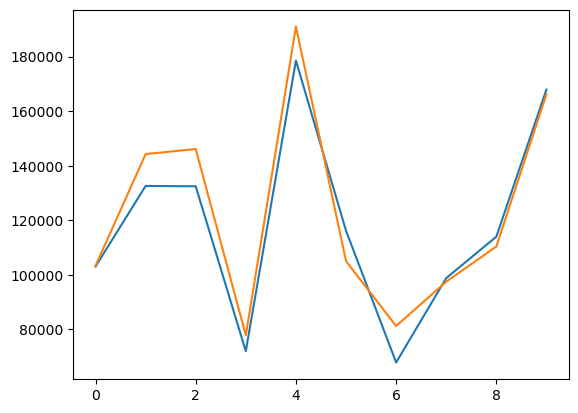

In [34]:
plt.plot(concatenated_array)